In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorboard
from keras.callbacks import Callback, TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pip install tensorflow_hub

In [3]:
train_image='D:/Documents/Capstone/Project -2/Dataset/Full/train'

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)

In [5]:
training_set=train_datagen.flow_from_directory(train_image,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=5)

Found 1852 images belonging to 11 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=test_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/Dataset/Full/test',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=5)

Found 910 images belonging to 11 classes.


In [7]:
#Mobilenet
mobileNet = "https://tfhub.dev/google/imagenet/mobilenet_v2_050_224/classification/5"

In [8]:
# model 
model = Sequential([
    #layer input
    hub.KerasLayer(mobileNet, input_shape=(224, 224, 3), trainable=False),
    #layer output
    Dense(11, activation="softmax")]
)

In [10]:
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy", tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1988505   
                                                                 
 dense (Dense)               (None, 11)                11022     
                                                                 
Total params: 1,999,527
Trainable params: 11,022
Non-trainable params: 1,988,505
_________________________________________________________________


In [11]:
early = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [12]:
batch_size=512
STEP_SIZE_TRAIN = training_set.n//training_set.batch_size
STEP_SIZE_VALID = test_set.n//test_set.batch_size

# fit model
history = model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks=[early])

Epoch 1/10
370/370 [==============================] - 841s 2s/step - loss: 1.2613 - accuracy: 0.6037 - auc: 0.9187 - precision: 0.7167 - recall: 0.5068 - true_positives: 936.0000 - val_loss: 0.9558 - val_accuracy: 0.6989 - val_auc: 0.9524 - val_precision: 0.7649 - val_recall: 0.6077 - val_true_positives: 553.0000
Epoch 2/10
370/370 [==============================] - 860s 2s/step - loss: 0.8427 - accuracy: 0.7347 - auc: 0.9615 - precision: 0.7991 - recall: 0.6784 - true_positives: 1253.0000 - val_loss: 0.9516 - val_accuracy: 0.7022 - val_auc: 0.9533 - val_precision: 0.7646 - val_recall: 0.6495 - val_true_positives: 591.0000
Epoch 3/10
370/370 [==============================] - 1592s 4s/step - loss: 0.7299 - accuracy: 0.7520 - auc: 0.9707 - precision: 0.8064 - recall: 0.7217 - true_positives: 1333.0000 - val_loss: 0.9723 - val_accuracy: 0.7209 - val_auc: 0.9519 - val_precision: 0.7624 - val_recall: 0.6912 - val_true_positives: 629.0000
Epoch 4/10
370/370 [==============================] 

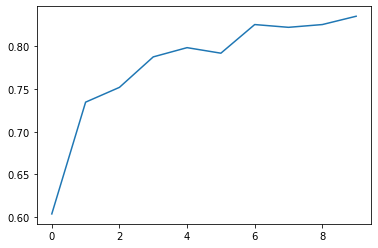

In [13]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()